<a href="https://colab.research.google.com/github/thanig/hello-world/blob/master/FirstMLSampleX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 10926 bytes


In [7]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

print(tf.__version__)

1.13.0-rc1


In [8]:
sfdata = pd.read_csv("data.csv")
sfdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
sfdata.head(1)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0


In [0]:
column_names=['User ID','Gender','Age','EstimatedSalary','Purchased']

In [0]:
raw_data=pd.read_csv("data.csv",
#                      names=column_names, 
                     na_values="?", 
                     comment='\t', 
                     sep=",",
                     skipinitialspace=True)


In [0]:
dataset=raw_data.copy()

In [46]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [47]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0
399,15594041,0,49,36000,1


In [48]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [0]:
# drop user id column
dataset=dataset.drop(['User ID'], axis=1)


In [0]:
dataset['Gender'].replace("Male",1,inplace=True)
dataset['Gender'].replace("Female",0,inplace=True)

In [54]:
dataset.tail()

,Gender,Age,EstimatedSalary,Purchased
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0
399,0,49,36000,1


In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

In [56]:
train_dataset.tail()

,Gender,Age,EstimatedSalary,Purchased
279,0,50,36000,1
227,1,56,133000,1
148,1,29,61000,0
143,1,30,89000,0
180,1,26,16000,0


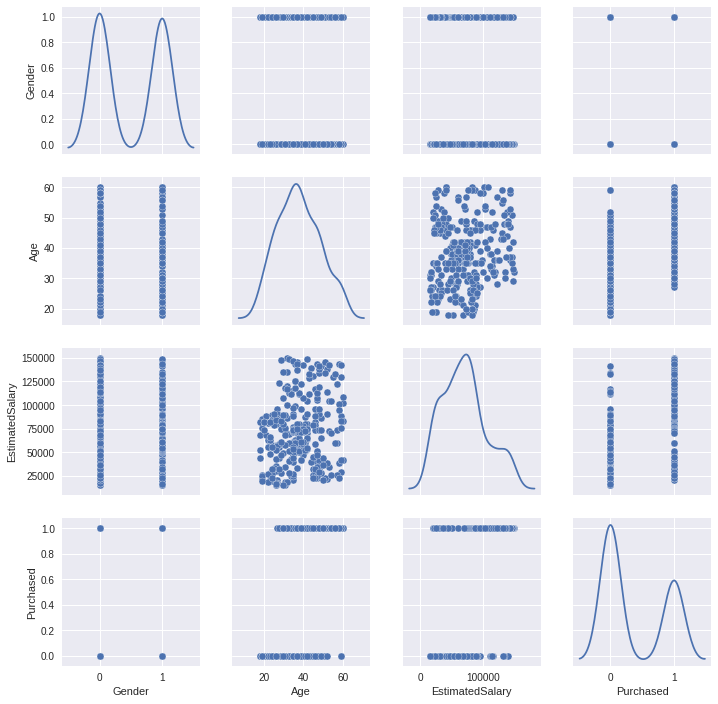

In [57]:
import seaborn as sns
sns.pairplot(train_dataset[["Gender", "Age", "EstimatedSalary", "Purchased"]], diag_kind="kde")


In [58]:
train_stats = train_dataset.describe()
train_stats.pop("Purchased")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Gender,320.0,0.490625,0.500695,0.0,0.0,0.0,1.0,1.0
Age,320.0,37.728125,10.495162,18.0,30.0,37.0,46.0,60.0
EstimatedSalary,320.0,70606.250000,34704.502138,15000.0,44000.0,71000.0,88000.0,150000.0


In [0]:
train_labels = train_dataset.pop('Purchased')
test_labels = test_dataset.pop('Purchased')


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [63]:
normed_train_data.head()

,Gender,Age,EstimatedSalary
132,1.017336,-0.736351,0.472381
309,-0.979888,0.025905,-0.593763
341,1.017336,-0.259941,0.126605
196,-0.979888,-0.736351,0.241863
246,-0.979888,-0.259941,-0.593763


In [0]:
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [67]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [69]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.02339724],
       [-0.0387025 ],
       [ 0.04514253],
       [ 0.02393032],
       [-0.01820794],
       [ 0.04244781],
       [ 0.10976446],
       [ 0.03965528],
       [ 0.15892047],
       [-0.14872949]], dtype=float32)

In [70]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

In [71]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.029956,0.104675,0.029956,0.130478,0.215690,0.130478,995
996,0.030279,0.104433,0.030279,0.132136,0.215035,0.132136,996
997,0.030988,0.109650,0.030988,0.131312,0.205059,0.131312,997
998,0.027272,0.091203,0.027272,0.129641,0.219295,0.129641,998
999,0.030380,0.102490,0.030380,0.124339,0.221461,0.124339,999


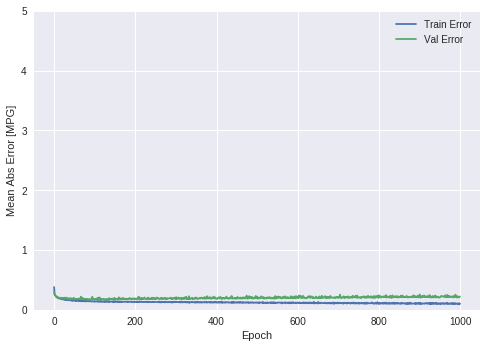

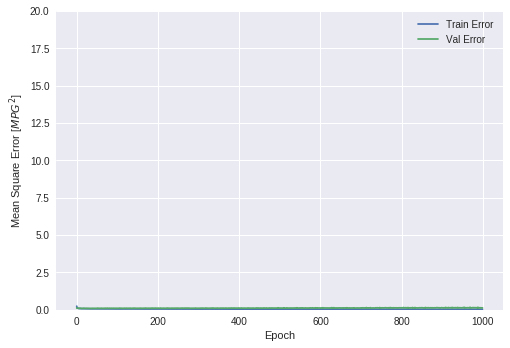

In [73]:
import matplotlib.pyplot as plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


............................

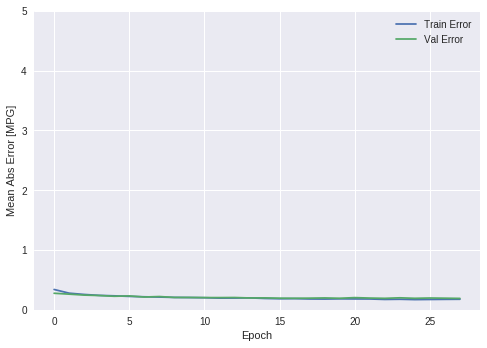

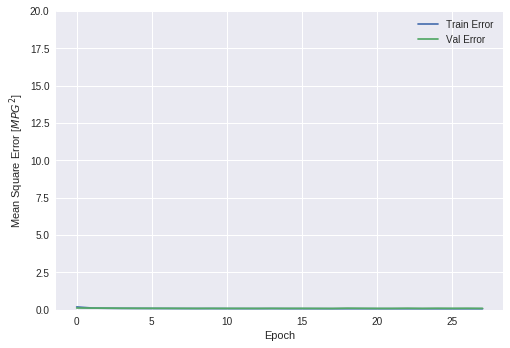

In [74]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [75]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Purchased".format(mae))

Testing set Mean Abs Error:  0.15 Purchased


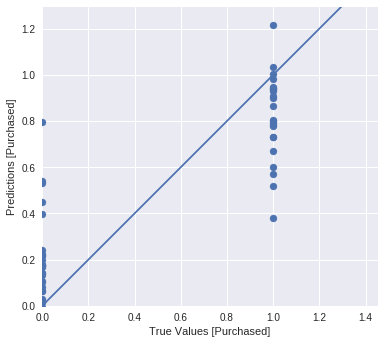

In [76]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Purchased]')
plt.ylabel('Predictions [Purchased]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

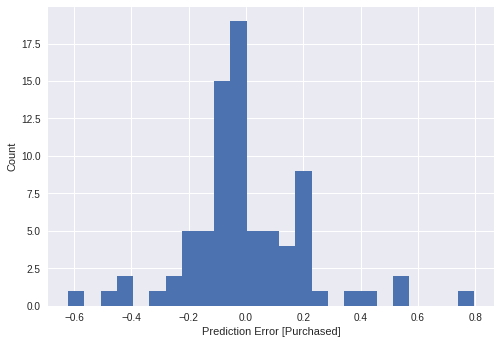

In [78]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Purchased]")
_ = plt.ylabel("Count")